<a href="https://colab.research.google.com/github/leahandofir/earthformer-inference-experiments/blob/main/working_with_h5_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl 'https://raw.githubusercontent.com/leahandofir/earthformer-inference-experiments/main/google_collab_experiments/prerequisites.sh' -o ./prerequisites.sh
!bash ./prerequisites.sh

In [ ]:
!aws s3 ls --no-sign-request s3://sevir/data/vil --recursive --human-readable --region us-west-2

2020-04-15 02:49:50    9.7 GiB data/vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5
2020-04-15 02:49:50   12.8 GiB data/vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0901_1231.h5
2020-04-15 02:49:57    1.3 GiB data/vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
2020-04-15 02:50:00    4.6 GiB data/vil/2017/SEVIR_VIL_STORMEVENTS_2017_0701_1231.h5
2020-04-15 02:50:09   11.5 GiB data/vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0101_0430.h5
2020-04-15 02:52:12   15.9 GiB data/vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0501_0831.h5
2020-04-15 02:58:05   15.1 GiB data/vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0901_1231.h5
2020-04-15 03:06:49    5.3 GiB data/vil/2018/SEVIR_VIL_STORMEVENTS_2018_0101_0630.h5
2020-04-15 03:10:18    5.7 GiB data/vil/2018/SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5
2020-04-15 18:28:01   15.2 GiB data/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0101_0430.h5
2020-04-15 18:28:02   15.6 GiB data/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0501_0831.h5
2020-04-15 18:28:02   15.1 GiB data/vil/2019/SEVIR_VIL_RAN

In [ ]:
!aws s3 cp --no-sign-request --region us-west-2 s3://sevir/data/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5 ~/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5

download: s3://sevir/data/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5 to ../root/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5


In [ ]:
import numpy as np
import h5py

hf = h5py.File('../root/vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5', 'r')

print(f"keys: {hf.keys()}")

keys: <KeysViewHDF5 ['id', 'vil']>


In [ ]:
hf_id = hf.get('id')
hf_vil = hf.get('vil')

In [ ]:
print(hf_vil)
print(hf_id)

<HDF5 dataset "vil": shape (2239, 384, 384, 49), type "|u1">
<HDF5 dataset "id": shape (2239,), type "|S18">


In [ ]:
hf_id[:3]

array([b'R19101910027435', b'R19101910027914', b'R19101910027152'],
      dtype='|S18')

In [ ]:
vil_arr = np.array(hf_vil)

In [ ]:
sample_image = vil_arr[561,:,:,13]

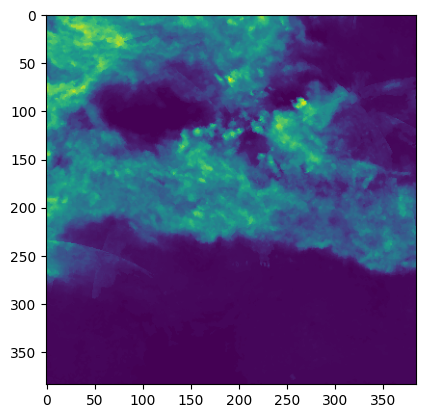

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(sample_image)

LETS DO THE SAME WITH VIS

In [ ]:
!aws s3 ls --no-sign-request s3://sevir/data/vis --recursive --human-readable --region us-west-2

In [ ]:
!aws s3 cp --no-sign-request --region us-west-2 s3://sevir/data/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5 ~/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5

download: s3://sevir/data/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5 to ../root/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5


In [ ]:
import numpy as np
import h5py

hf_vis = h5py.File('../root/vis/2019/SEVIR_VIS_RANDOMEVENTS_2019_0711_0720.h5', 'r')

print(f"keys: {hf_vis.keys()}")

keys: <KeysViewHDF5 ['id', 'vis']>


In [ ]:
hf_vis_id = hf_vis.get('id')
hf_vis_vis = hf_vis.get('vis')

In [ ]:
vis_arr = np.array(hf_vis_vis)

In [ ]:
vis_arr.shape

(40, 768, 768, 49)

In [ ]:
sample_image_vis = vis_arr[10,:,:,13]

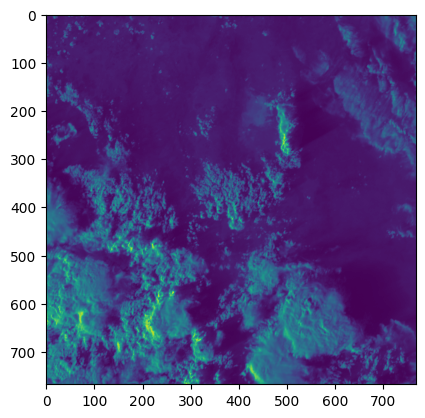

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(sample_image_vis)

# STORE OUR OWN FILES IN NEW H5 FILES

In [ ]:
!git clone https://github.com/leahandofir/earthformer-inference-experiments.git

In [ ]:
# installing PyPNG
!python -m pip install git+https://gitlab.com/drj11/pypng@pypng-0.20220715.0

In [ ]:
import png

## (1) greyscale

In [ ]:
greyscale_img = png.Reader(file=open("/content/earthformer-inference-experiments/google_colab_experiments/harel_image_types_examples/greyscale.png", "rb"))
greyscale_img.read()

(600,
 600,
 <generator object Reader._iter_bytes_to_values at 0x7faa07aec350>,
 {'greyscale': False,
  'alpha': True,
  'planes': 4,
  'bitdepth': 8,
  'interlace': 0,
  'size': (600, 600),
  'gamma': 0.45455,
  'background': (255, 255, 255)})

In [ ]:
pixels = greyscale_img.read()[2]

In [ ]:
row = np.array(list(pixels[0]))
row.shape

(2400,)

In [ ]:
np_array_of_rgb = np.array([list(row) for row in pixels])
np_array_of_rgb = np_array_of_rgb.reshape(600,600,4)

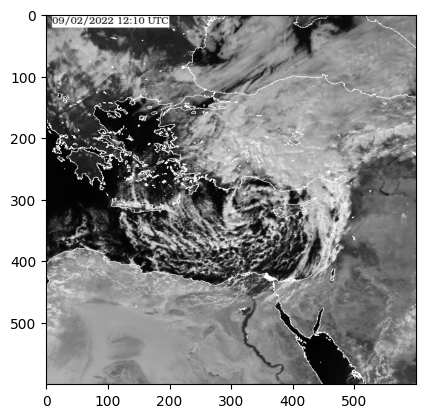

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np_array_of_rgb)

## (2) natural

In [ ]:
natural_img = png.Reader(file=open("/content/earthformer-inference-experiments/google_colab_experiments/harel_image_types_examples/natural.png", "rb"))
natural_pixels = natural_img.read()[2]

In [ ]:
natural_np_array_of_rgb = np.array([list(row) for row in natural_pixels])
natural_np_array_of_rgb = natural_np_array_of_rgb.reshape(600,600,4)

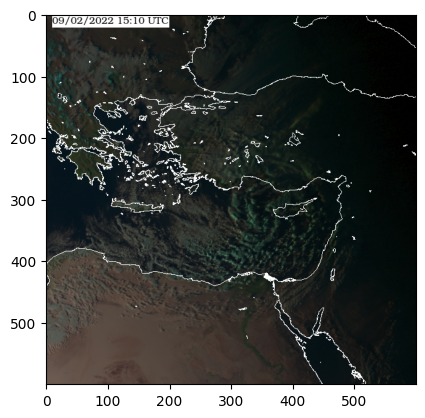

In [ ]:
plt.imshow(natural_np_array_of_rgb)

## (3) dayclouds

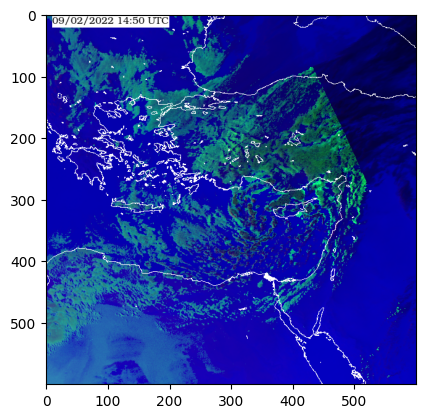

In [ ]:
dayclouds_img = png.Reader(file=open("/content/earthformer-inference-experiments/google_colab_experiments/harel_image_types_examples/dayclouds.png", "rb"))
dayclouds_pixels = dayclouds_img.read()[2]
dayclouds_np_array_of_rgb = np.array([list(row) for row in dayclouds_pixels])
dayclouds_np_array_of_rgb = dayclouds_np_array_of_rgb.reshape(600,600,4)
plt.imshow(dayclouds_np_array_of_rgb)

## (4) cloudmask

In [ ]:
# link to harel's github repo: https://colab.research.google.com/drive/1Mi6hQdkpk9JUpkyAxHAJkpYEHpSK4HQX?usp=sharing 

In [ ]:
import netCDF4
from netCDF4 import Dataset

cloudmask_file = Dataset("/content/earthformer-inference-experiments/google_colab_experiments/harel_image_types_examples/cloudmask.nc")

In [ ]:
dir(cloudmask_file)

['Conventions',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_close',
 '_close_mem',
 '_enddef',
 '_getname',
 '_grpid',
 '_isopen',
 '_ncstring_attrs__',
 '_redef',
 'cdm_data_type',
 'centre_projection_longitude',
 'cgms_projection',
 'close',
 'cmptypes',
 'comment',
 'contact',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'creator_email',
 'creator_name',
 'creator_url',
 'data_model',
 'date_created',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'fromcdl',
 'gdal_geotransform_table',
 'gdal_projection',
 '

In [ ]:
cloudmask_file.variables['cma']

<class 'netCDF4._netCDF4.Variable'>
uint8 cma(ny, nx)
    standard_name: cloud_binary_mask
    long_name: NWC GEO CMA Cloud Mask
    valid_range: [0 1]
    _FillValue: 255
    ancillary_variables: cma_status_flag cma_conditions cma_quality cma_pal
    coordinates: lon lat
    comment: 0:  Cloud free; 1: Cloudy
    flag_values: [0 1]
    flag_meanings: Cloud_free Cloudy
unlimited dimensions: 
current shape = (928, 2295)
filling on

# Creating an HDF5 File

In [ ]:
# this represents an image we might want to save in an h5 file
dayclouds_img = png.Reader(file=open("/content/earthformer-inference-experiments/google_colab_experiments/harel_image_types_examples/dayclouds.png", "rb"))
dayclouds_pixels = dayclouds_img.read()[2]
dayclouds_np_array_of_rgb = np.array([list(row) for row in dayclouds_pixels])
dayclouds_np_array_of_rgb = dayclouds_np_array_of_rgb.reshape(600,600,4)
plt.imshow(dayclouds_np_array_of_rgb)

In [ ]:
import h5py

images = np.array([[dayclouds_np_array_of_rgb for i in range(6)] for j in range(5)])
images = np.moveaxis(images, 1, -1)
print(images.shape)

hf = h5py.File('MS_DAYCLOUDS_2022_0601_0801.h5', 'w')

hf.create_dataset('id', data=[f'2022062{i}' for i in range(5)])
hf.create_dataset('dayclouds', data=images)

(5, 600, 600, 4, 6)


<HDF5 dataset "dayclouds": shape (5, 600, 600, 4, 6), type "<i8">

In [ ]:
hf.close()

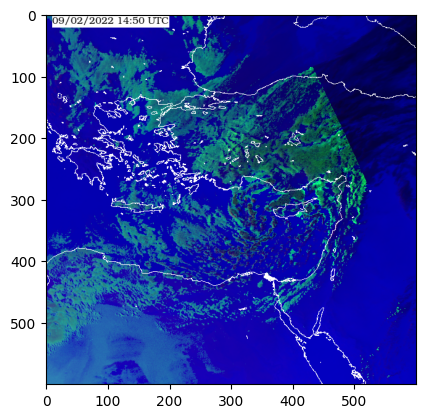

In [ ]:
hf = h5py.File('MS_DAYCLOUDS_2022_0601_0801.h5', 'r')

images = np.array(hf.get('dayclouds'))
sample_image = images[3,:,:,:,0]

import matplotlib.pyplot as plt
plt.imshow(sample_image)

# uniformly sample a date

In [ ]:
from random import randrange
from datetime import datetime, timedelta

def sample_date(start, end):
    random_day = randrange((end-start).days)
    return start + timedelta(days=random_day)

d1 = datetime(*(2019, 1, 1))
d2 = datetime(*(2019, 12, 31))

for i in range(10):
  print(sample_date(d1, d2))

364
2019-09-28 00:00:00
2019-09-04 00:00:00
2019-07-30 00:00:00
2019-12-24 00:00:00
2019-03-14 00:00:00
2019-07-16 00:00:00
2019-02-27 00:00:00
2019-01-24 00:00:00
2019-03-03 00:00:00
2019-12-08 00:00:00


In [ ]:
## write the catalog
# num_samples = 1600 
# for img_type in img_types:
#   for year in range():
#     for season in seasons:
#       for sample in range(num_samples/num_of_years*((start_season-end_season).days/365)):
#         #insert event to catalog (pd dataframe)

In [ ]:
## prepare h5 files
# for img_type in img_types:
#   for year in range():
#     for season in seasons:
#       read all samples from catalog (filter df by h5 file name)
#       for sample in samples
#         #find all relevent files
#         #extract pixels from files
#         #gather all into an array
#         #append array to the total array of the season
#       #write all of the events in that season to h5 file